In [1]:
import IPython
import pandas as pd
import numpy as np
from statistics import mode
import statsmodels.api as sm
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler

/Users/t_shahh/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# load modified file with some pre-processing completed
df = pd.read_csv("preprocessed_4.csv", index_col=0)
df.shape

(100120, 54)

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,0,0,0,1,1,1,1,1,0,0
age,1,2,3,4,5,6,7,8,9,10
admission_type_id,5,1,1,1,1,1,3,1,1,3
discharge_disposition_id,18,1,1,1,1,1,1,1,1,2
admission_source_id,1,7,7,7,7,1,1,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12
num_lab_procedures,41,59,11,44,51,31,70,73,68,33


In [4]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

df[i] = df[i].astype('object')

In [5]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [6]:
L1 = np.random.randint(1,10,20)
L2 = np.random.randint(1,20, 20)

datframe = pd.DataFrame()
datframe['L1'] = L1
datframe['L2'] = L2

In [7]:
datframe.corr()

,L1,L2
L1,1.000000,-0.276725
L2,-0.276725,1.000000


In [8]:
scaler = MinMaxScaler()
datframe = pd.DataFrame(scaler.fit_transform(datframe), columns = ['L1', 'L2'])
datframe.corr()

,L1,L2
L1,1.000000,-0.276725
L2,-0.276725,1.000000


In [9]:
"""
This code converts age as categorical variable to a continuous approximation by assuming mid-point of each age-category as
the actual age value. This is done to avoid having to deal with age as a dummy variable in the models which makes
interpretation very cumbersome. Also, since age category is not purely nominal but ordinal, we do not want to lose that
information by treating it as a simple categorical variable.
"""

# convert age back to integer type
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     25564
7     22186
6     17102
9     16708
5      9626
4      3765
10     2669
3      1650
2       690
1       160
Name: age, dtype: int64
75    25564
65    22186
55    17102
85    16708
45     9626
35     3765
95     2669
25     1650
15      690
5       160
Name: age, dtype: int64


In [10]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'change'})

In [11]:
num_col

['readmitted',
 'num_lab_procedures',
 'number_diagnoses',
 'numchange',
 'number_outpatient',
 'service_utilization',
 'num_procedures',
 'number_inpatient',
 'age',
 'nummed',
 'number_emergency',
 'num_medications',
 'time_in_hospital']

In [12]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value (2)

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [13]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,readmitted,0.356406,-1.736208,0.924887,No,NA,0.356406,-1.736208,0.924887
1,num_lab_procedures,-0.241491,-0.253099,19.620228,No,NA,-0.241491,-0.253099,19.620228
2,number_diagnoses,-0.867785,-0.109005,1.938211,No,NA,-0.867785,-0.109005,1.938211
3,numchange,1.425310,1.433619,0.487858,No,NA,1.425310,1.433619,0.487858
4,number_outpatient,8.818291,148.558544,1.263973,Yes,log1p,2.733914,7.804218,0.429394
5,service_utilization,5.334724,67.779770,2.292730,Yes,log1p,1.119136,0.547353,0.662373
6,num_procedures,1.326020,0.890773,1.700335,No,NA,1.326020,0.890773,1.700335
7,number_inpatient,3.626402,20.833542,1.261825,Yes,log1p,1.450492,1.405364,0.510433
8,age,-0.626715,0.274302,15.947496,No,NA,-0.626715,0.274302,15.947496
9,nummed,0.675116,0.277244,0.921620,No,NA,0.675116,0.277244,0.921620


In [14]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [15]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [16]:
df.shape

(100120, 54)

In [17]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'change'})

In [18]:
numerics

['readmitted',
 'num_lab_procedures',
 'number_diagnoses',
 'number_inpatient_log1p',
 'service_utilization_log1p',
 'numchange',
 'number_emergency_log1p',
 'num_procedures',
 'number_outpatient_log1p',
 'age',
 'nummed',
 'num_medications',
 'time_in_hospital']

In [19]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                            int64
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                      int64
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
acetohexamide                  int64
glipizide                      int64
glyburide                      int64
tolbutamide                    int64
p

In [20]:
df.A1Cresult.value_counts()

-99    83243
 1     11935
 0      4942
Name: A1Cresult, dtype: int64

In [21]:
dfcopy = df.copy(deep = True)

In [22]:
df = dfcopy.copy(deep = True)

In [23]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [24]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [25]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,change,diabetesMed,readmitted,numchange,nummed,level1_diag1,number_outpatient_log1p,service_utilization_log1p,number_inpatient_log1p,number_emergency_log1p
0,2278392,8222157,Caucasian,0,5,5,18,1,1,41,...,0,0,0,0,0,4,0.0,0.0,0.0,0.0
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,1,1,0,1,1,0,0.0,0.0,0.0,0.0


In [26]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [27]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [28]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,1,1,1
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8


### Scaling applied to df; using df2 from here

In [29]:
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [30]:
# Logical order: duplicate removal, then outlier removal followed by scaling

In [31]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(70442, 54)

In [32]:
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

In [33]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [34]:
df2[numerics] = standardize(df2[numerics])

In [35]:
import seaborn as sns
from matplotlib.colors import ListedColormap
# my_cmap = ListedColormap(sns.color_palette("RdYlGn", n_colors=15).as_hex())
# my_cmap = ListedColormap(sns.diverging_palette(150, 250, sep=120, n=28, center="light").as_hex())

my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
# drop some columns due to their means is round to 0
# table = df.drop(['acetohexamide','tolbutamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','patient_nbr', 'encounter_id', 'service_utilization_log1p'], axis = 1).corr(method='pearson')
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

/Users/t_shahh/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


In [36]:
pd.options.display.max_rows = 400

c = df2.corr().abs()
s = c.unstack()
print(s.shape)
so = s.sort_values(ascending=False)

so[38:120]

(2209,)


glyburide                            glyburide                              1.000000
tolbutamide                          tolbutamide                            1.000000
pioglitazone                         pioglitazone                           1.000000
rosiglitazone                        rosiglitazone                          1.000000
age|number_diagnoses                 age|number_diagnoses                   1.000000
encounter_id                         encounter_id                           1.000000
number_diagnoses|time_in_hospital    time_in_hospital                       0.935231
time_in_hospital                     number_diagnoses|time_in_hospital      0.935231
numchange                            num_medications|numchange              0.899545
num_medications|numchange            numchange                              0.899545
num_medications|number_diagnoses     num_medications                        0.893208
num_medications                      num_medications|number_diagn

In [37]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)

In [38]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [39]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['rosiglitazone',
 'troglitazone',
 'num_medications|time_in_hospital',
 'number_diagnoses',
 'insulin',
 'glyburide',
 'numchange',
 'service_utilization_log1p',
 'number_emergency_log1p',
 'pioglitazone',
 'glimepiride',
 'nummed',
 'repaglinide',
 'num_medications|num_procedures',
 'time_in_hospital',
 'number_diagnoses|time_in_hospital',
 'glipizide-metformin',
 'metformin-rosiglitazone',
 'num_lab_procedures',
 'number_inpatient_log1p',
 'glimepiride-pioglitazone',
 'num_medications|numchange',
 'miglitol',
 'num_medications',
 'time_in_hospital|num_lab_procedures',
 'glipizide',
 'patient_nbr',
 'acetohexamide',
 'metformin-pioglitazone',
 'chlorpropamide',
 'num_procedures',
 'diabetesMed',
 'metformin',
 'number_outpatient_log1p',
 'encounter_id',
 'A1Cresult',
 'age|number_diagnoses',
 'num_medications|num_lab_procedures',
 'nateglinide',
 'glyburide-metformin',
 'tolazamide',
 'age',
 'acarbose',
 'num_medications|number_diagnoses',
 'tolbutamide']

In [40]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

# new_non_num_cols

In [41]:
new_non_num_cols

['race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [42]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

### Modeling

In [43]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 
                 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 
                 'race_Hispanic', 'race_Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5',  
                 'admission_source_id_4', 'admission_source_id_7', 'admission_source_id_8', 
                 'admission_source_id_9', 'admission_source_id_11', 'max_glu_serum_0', 
                 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1', 
                 'num_medications|time_in_hospital',
                 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures',
                 'num_medications|num_lab_procedures',
                 'num_medications|number_diagnoses',
                 'age|number_diagnoses',
                 'number_diagnoses|time_in_hospital',
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [44]:
# full_feature_list = ['age', 'time_in_hospital', 'num_lab_procedures',
#        'num_procedures', 'num_medications', 'number_outpatient_log1p',
#        'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses',
#        'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
#        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
#        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
#        'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
#        'glimepiride-pioglitazone', 'metformin-rosiglitazone',
#        'metformin-pioglitazone', 'diabetesMed', 'service_utilization_log1p',
#        'level1_diag1', 'race_?', 'race_AfricanAmerican', 'race_Asian',
#        'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_0', 'gender_1',
#        'admission_type_id_1', 'admission_type_id_2', 'admission_type_id_3',
#        'admission_type_id_4', 'admission_type_id_5', 'admission_type_id_6',
#        'admission_type_id_7', 'admission_type_id_8',
#        'discharge_disposition_id_1', 'discharge_disposition_id_2',
#        'discharge_disposition_id_3', 'discharge_disposition_id_4',
#        'discharge_disposition_id_5', 'discharge_disposition_id_6',
#        'discharge_disposition_id_7', 'discharge_disposition_id_8',
#        'discharge_disposition_id_9', 'discharge_disposition_id_10',
#        'discharge_disposition_id_12', 'discharge_disposition_id_13',
#        'discharge_disposition_id_14', 'discharge_disposition_id_15',
#        'discharge_disposition_id_16', 'discharge_disposition_id_17',
#        'discharge_disposition_id_18', 'discharge_disposition_id_19',
#        'discharge_disposition_id_20', 'discharge_disposition_id_22',
#        'discharge_disposition_id_23', 'discharge_disposition_id_24',
#        'discharge_disposition_id_25', 'discharge_disposition_id_27',
#        'discharge_disposition_id_28', 'admission_source_id_1',
#        'admission_source_id_2', 'admission_source_id_3',
#        'admission_source_id_4', 'admission_source_id_5',
#        'admission_source_id_6', 'admission_source_id_7',
#        'admission_source_id_8', 'admission_source_id_9',
#        'admission_source_id_10', 'admission_source_id_11',
#        'admission_source_id_13', 'admission_source_id_14',
#        'admission_source_id_17', 'admission_source_id_20',
#        'admission_source_id_22', 'admission_source_id_25', 'max_glu_serum_-99',
#        'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_-99', 'A1Cresult_0',
#        'A1Cresult_1', 'nummed', 'numchange', 'nummed|change',
#      'num_medications|time_in_hospital',
#      'num_medications|num_procedures',
#      'time_in_hospital|num_lab_procedures',
#      'num_medications|num_lab_procedures',
#      'num_medications|number_diagnoses',
#      'age|number_diagnoses',
#      'change|num_medications',
#      'number_diagnoses|time_in_hospital',
#      'num_medications|numchange']

In [45]:
train_input = df_pd[feature_set]
train_output = df_pd['change']

In [46]:
df_pd['change'].value_counts()

0    32145
1    24331
Name: change, dtype: int64

In [47]:
train_input.columns

Index(['age', 'time_in_hospital', 'num_procedures', 'num_medications',
       'number_outpatient_log1p', 'number_emergency_log1p',
       'number_inpatient_log1p', 'number_diagnoses', 'race_AfricanAmerican',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'gender_1', 'admission_type_id_3', 'admission_type_id_4',
       'admission_type_id_5', 'admission_source_id_4', 'admission_source_id_7',
       'admission_source_id_8', 'admission_source_id_9',
       'admission_source_id_11', 'max_glu_serum_0', 'max_glu_serum_1',
       'A1Cresult_0', 'A1Cresult_1', 'num_medications|time_in_hospital',
       'num_medications|num_procedures', 'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'number_diagnoses|time_in_hospital', 'level1_diag1_1.0',
       'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
       'level1_diag1_5.0', 'level1_diag1_6.0', 'level

In [48]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import RandomizedLogisticRegression
# clffeat = RandomizedLogisticRegression()
# X_train, X_dev, Y_train, Y_dev = train_test_split(train_input, train_output, test_size=0.20, random_state=0)
# clffeat.fit(train_input,train_output)
# lstfeat = list(clffeat.get_support(indices=True))
# score = list(clffeat.all_scores_)

In [49]:
# favorfeatures = [list(X_train.columns)[i] for i in lstfeat]

In [50]:
# score  = [float(x) for x in score]
# Z = [(x[1],x[0]) for x in sorted(zip(score,X_train.columns), reverse = True)]
# Znew = []
# for x in Z:
#     if x[0] in favorfeatures:
#         Znew.append(x)

In [51]:
# Znew

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input, train_output, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=25))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

Cross Validation Score: 63.73%
Dev Set score: 64.24%


In [53]:
Y_dev_predict = logreg.predict(X_dev)

In [54]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,636,269,905
1,375,147,522
All,1011,416,1427


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_logreg = accuracy_score(Y_dev, Y_dev_predict)
precision_logreg = precision_score(Y_dev, Y_dev_predict)
recall_logreg = recall_score(Y_dev, Y_dev_predict)
auc_logreg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.64
Precision is 0.61
Recall is 0.45
AUC is 0.62


In [56]:
logit = sm.Logit(Y_train, X_train)

result = logit.fit()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

print(result.summary())


         Current function value: 0.631748
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 change   No. Observations:                45180
Model:                          Logit   Df Residuals:                    45139
Method:                           MLE   Df Model:                           40
Date:                Mon, 04 Dec 2017   Pseudo R-squ.:                 0.07620
Time:                        23:33:27   Log-Likelihood:                -28542.
converged:                      False   LL-Null:                       -30897.
                                        LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
age                                    -0.0066      0.024     -0.273      0.785      -0.054   

/Users/t_shahh/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [57]:
[print(fname, coeffs) for fname, coeffs in zip(X_train.columns, np.round(logreg.coef_[0],3))];

age -0.036
time_in_hospital 0.195
num_procedures -0.144
num_medications 0.602
number_outpatient_log1p 0.051
number_emergency_log1p 0.073
number_inpatient_log1p -0.008
number_diagnoses -0.122
race_AfricanAmerican -0.101
race_Asian -0.103
race_Caucasian -0.089
race_Hispanic 0.045
race_Other 0.196
gender_1 0.099
admission_type_id_3 -0.077
admission_type_id_4 -0.026
admission_type_id_5 -0.191
admission_source_id_4 -0.192
admission_source_id_7 0.103
admission_source_id_8 0.023
admission_source_id_9 0.165
admission_source_id_11 -0.025
max_glu_serum_0 -0.567
max_glu_serum_1 0.287
A1Cresult_0 -0.093
A1Cresult_1 0.618
num_medications|time_in_hospital -0.004
num_medications|num_procedures -0.002
time_in_hospital|num_lab_procedures -0.001
num_medications|num_lab_procedures 0.0
num_medications|number_diagnoses 0.003
age|number_diagnoses -0.0
number_diagnoses|time_in_hospital 0.003
level1_diag1_1.0 -0.074
level1_diag1_2.0 -0.072
level1_diag1_3.0 -0.553
level1_diag1_4.0 0.606
level1_diag1_5.0 -0.138

In [58]:
logreg.intercept_

array([-0.18680167])

In [59]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=7, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, X_train, Y_train, cv=25))))
dte.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dte.score(X_dev, Y_dev)))

Cross Validation score: 62.46%
Dev Set score: 63.15%


In [60]:
Y_dev_predict = dte.predict(X_dev)

In [61]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,642,263,905
1,374,148,522
All,1016,411,1427


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dte = accuracy_score(Y_dev, Y_dev_predict)
precision_dte = precision_score(Y_dev, Y_dev_predict)
recall_dte = recall_score(Y_dev, Y_dev_predict)
auc_dte = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.63
Precision is 0.59
Recall is 0.45
AUC is 0.61


In [63]:
from sklearn.tree import DecisionTreeClassifier
dtg = DecisionTreeClassifier(max_depth=7, criterion = "gini", min_samples_split=10)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(dtg, X_train, Y_train, cv=25))))
dtg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dtg.score(X_dev, Y_dev)))

Cross Validation Score: 62.32%
Dev Set score: 62.91%


In [64]:
Y_dev_predict = dtg.predict(X_dev)

In [65]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,629,276,905
1,366,156,522
All,995,432,1427


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dtg = accuracy_score(Y_dev, Y_dev_predict)
precision_dtg = precision_score(Y_dev, Y_dev_predict)
recall_dtg = recall_score(Y_dev, Y_dev_predict)
auc_dtg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.63
Precision is 0.58
Recall is 0.45
AUC is 0.61


In [67]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=7, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=25))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 63.09%
Dev Set score: 63.32%


In [68]:
Y_dev_predict = forrest.predict(X_dev)

In [69]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,650,255,905
1,363,159,522
All,1013,414,1427


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forreste = accuracy_score(Y_dev, Y_dev_predict)
precision_forreste = precision_score(Y_dev, Y_dev_predict)
recall_forreste = recall_score(Y_dev, Y_dev_predict)
auc_forreste = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.63
Precision is 0.60
Recall is 0.44
AUC is 0.61


In [71]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=7, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=25))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 63.41%
Dev Set score: 63.18%


In [72]:
Y_dev_predict = forrest.predict(X_dev)

In [73]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,648,257,905
1,365,157,522
All,1013,414,1427


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forrestg = accuracy_score(Y_dev, Y_dev_predict)
precision_forrestg = precision_score(Y_dev, Y_dev_predict)
recall_forrestg = recall_score(Y_dev, Y_dev_predict)
auc_forrestg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.63
Precision is 0.59
Recall is 0.44
AUC is 0.61


In [75]:
# valdepth= 0
# valsplit = 0
# valestimators = 0
# valscore = 0

# for b in range(5,15):
#     for i in range (3,15):
#         for z in range (5,15):
#             forrest = RandomForestClassifier(n_estimators = b, max_depth=i,criterion="gini",min_samples_split=z)
#             scores = cross_val_score(forrest, X_train, Y_train, cv=5)
#             score_mean = np.mean(scores)
#             if valscore < score_mean:
#                 valscore = score_mean
#                 valdepth = i
#                 valsplit = z
#                 valestimators = b

# forrest = RandomForestClassifier(n_estimators = b, max_depth=valdepth,criterion="entropy",min_samples_split=valsplit)

# print("MODEL: RANDOM FORESTS WITH GINI AS ATTRIBUTE SELECTION METHOD \n")
# print("\nParamters for best model \nmax_depth : " + str(valdepth) + "\nmin_samples_split : " + str(valsplit) + "\n")

# print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train[favorfeatures], Y_train, cv=25))))
# forrest.fit(X_train, Y_train)
# print("Dev Set Score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

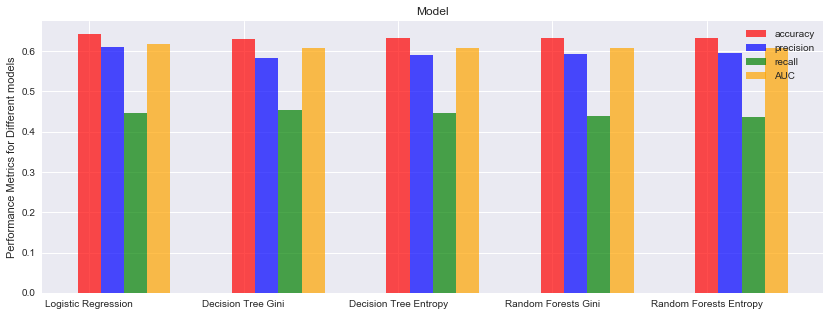

In [76]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [accuracy_logreg, accuracy_dtg, accuracy_dte, accuracy_forrestg, accuracy_forreste]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [precision_logreg, precision_dtg, precision_dte, precision_forrestg, precision_forreste]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [recall_logreg, recall_dtg, recall_dte, recall_forrestg, recall_forreste]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy' ]
values = [auc_logreg, auc_dtg, auc_dte, auc_forrestg, auc_forreste]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

In [77]:
coefs = [(x[2], x[1]) for x in sorted(zip(list(np.abs(logreg.coef_[0])), list(logreg.coef_[0]), list(train_input.columns)), reverse = True)]
print("Logistic Regression Coefficients in decreasing order of coefficient values")
coefs

Logistic Regression Coefficients in decreasing order of coefficient values


[('A1Cresult_1', 0.61838397230362752),
 ('level1_diag1_4.0', 0.60628631830566737),
 ('num_medications', 0.6019314868201513),
 ('max_glu_serum_0', -0.5665062088617796),
 ('level1_diag1_3.0', -0.55319543161647067),
 ('max_glu_serum_1', 0.28701261979035791),
 ('level1_diag1_6.0', -0.24991315917194556),
 ('race_Other', 0.19631951376334555),
 ('time_in_hospital', 0.1951575468803089),
 ('admission_source_id_4', -0.19170826038961739),
 ('admission_type_id_5', -0.19115146902184396),
 ('level1_diag1_8.0', -0.18972789230115716),
 ('admission_source_id_9', 0.16454538694595036),
 ('num_procedures', -0.14373448818243623),
 ('level1_diag1_5.0', -0.13787289526496505),
 ('number_diagnoses', -0.12204666699704937),
 ('level1_diag1_7.0', -0.11709924691701291),
 ('admission_source_id_7', 0.10345831559373533),
 ('race_Asian', -0.10322204848444966),
 ('race_AfricanAmerican', -0.1008708456409015),
 ('gender_1', 0.099371714185031254),
 ('A1Cresult_0', -0.092564175013859745),
 ('race_Caucasian', -0.08945354963

In [78]:
impforrest = [(x[1], x[0]) for x in sorted(zip(list(forrest.feature_importances_), list(train_input.columns)), reverse = True)]
print("Random Forest Feature Importance in decreasing order")
impforrest

Random Forest Feature Importance in decreasing order


[('num_medications', 0.30000510265557578),
 ('num_medications|num_lab_procedures', 0.1436529346930428),
 ('num_medications|number_diagnoses', 0.12250858503368633),
 ('num_medications|time_in_hospital', 0.077518356569138441),
 ('A1Cresult_1', 0.061578038749443828),
 ('level1_diag1_4.0', 0.05732929494431329),
 ('num_medications|num_procedures', 0.033722974443978815),
 ('num_procedures', 0.024932451276004408),
 ('time_in_hospital|num_lab_procedures', 0.02173724934173895),
 ('level1_diag1_3.0', 0.021335077415812087),
 ('time_in_hospital', 0.020177065598993436),
 ('number_diagnoses|time_in_hospital', 0.016653559186411572),
 ('age', 0.015321757560031051),
 ('age|number_diagnoses', 0.013759071345925833),
 ('number_diagnoses', 0.013579159010623208),
 ('max_glu_serum_0', 0.012240160939794064),
 ('number_emergency_log1p', 0.0042603532573521506),
 ('gender_1', 0.0040824676043666758),
 ('admission_source_id_9', 0.0037155028226564303),
 ('number_outpatient_log1p', 0.0036672049094320933),
 ('admissi

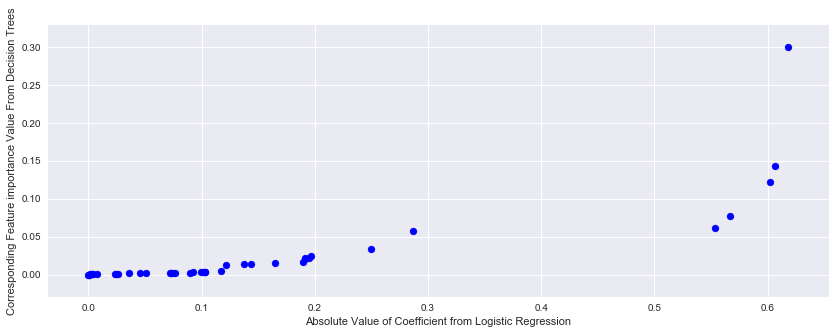

In [79]:
# plotting the absolute values of the coefficients from logistic regression with the feature importance from decision trees
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)
x = [np.abs(val[1]) for val in coefs]
y = [val[1] for val in impforrest]
plt.scatter(x, y, color = 'blue')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("Absolute Value of Coefficient from Logistic Regression")
plt.ylabel("Corresponding Feature importance Value From Decision Trees")
plt.show()